In [93]:
import os
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder,StandardScaler  

# libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objs as go
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode, plot
cf.go_offline()

# import machine learning libraries that will be used
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import confusion_matrix, precision_score, plot_confusion_matrix,classification_report
from sklearn import metrics


import warnings
warnings.filterwarnings("ignore")

In [18]:
# import data
data = pd.read_csv("case_study.csv")

In [4]:
# view first few rows of the imported data to confirm it imported properly
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,ID,MentalHealth,DiffWalking,Income,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,13423,30,No,30000,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,33574,0,No,40000,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,65906,30,No,40000,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,92780,0,No,40000,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,51415,0,Yes,40000,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [9]:
# Print the number of rows and columns to see how big the data is
rows = len(data.axes[0])
cols = len(data.axes[1])

print("Number of Rows: " + str(rows))
print("Number of Columns: " + str(cols))

Number of Rows: 202121
Number of Columns: 20


## Processing/Transformations

### 1.  Target variable/column: 
  y = HeartDisease

### 2. Independent variables: 

X = [ BMI, Smoking, AlcoholDrinking, Stroke, PhysicalHealth, MentalHealth,
       DiffWalking, Income, Sex, AgeCategory, Race, Diabetic, PhysicalActivity,
       GenHealth, SleepTime, Asthma, KidneyDisease, SkinCancer ]
       
       
The ID column will be left out because it's just a unique identifier of the survey question, it cannot be an indicator of heart disease.

### 3. Convert Target into integers

###### Reason for converting: 
The taget is a categorical variable (Yes/No) and since a machine learning model will be used to predict if someone is at risk of heart disease or not we need to convert it (and other categorical X variables will be converted later) because most machine learning models require all input and output variables to be numeric before a model is fitted and evaluated.

In [32]:
# convert target into numeric
data['HeartDisease'] = np.where(data['HeartDisease'] == 'Yes',1,0)

In [19]:
ID = data['ID'] 
data = data.drop(['ID'],axis=1)  # drop ID column

In [33]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Income,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,Yes,No,No,3,30,No,30000,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,0,20.34,No,No,Yes,0,0,No,40000,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,0,26.58,Yes,No,No,20,30,No,40000,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,0,24.21,No,No,No,0,0,No,40000,Female,75-79,White,No,No,Good,6,No,No,Yes
4,0,23.71,No,No,No,28,0,Yes,40000,Female,40-44,White,No,Yes,Very good,8,No,No,No


### Exploratory Data Analysis

In [23]:
# print percentage of missing data (if any) for each column
""" We need to see if there are missing values in the data as they can bias the 
    results of the machine learning models and/or reduce the accuracy of the model.
    If there're any we'd need to use appropriate approaches for each column to handle them, 
    such as imputation or missing value indicators.
"""
data.isnull().sum()/len(data)*100

HeartDisease        0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Income              0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float64

In [40]:
# more info about the columns - data types etc.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202121 entries, 0 to 202120
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      202121 non-null  int32  
 1   BMI               202121 non-null  float64
 2   Smoking           202121 non-null  object 
 3   AlcoholDrinking   202121 non-null  object 
 4   Stroke            202121 non-null  object 
 5   PhysicalHealth    202121 non-null  int64  
 6   MentalHealth      202121 non-null  int64  
 7   DiffWalking       202121 non-null  object 
 8   Income            202121 non-null  int64  
 9   Sex               202121 non-null  object 
 10  AgeCategory       202121 non-null  object 
 11  Race              202121 non-null  object 
 12  Diabetic          202121 non-null  object 
 13  PhysicalActivity  202121 non-null  object 
 14  GenHealth         202121 non-null  object 
 15  SleepTime         202121 non-null  int64  
 16  Asthma            20

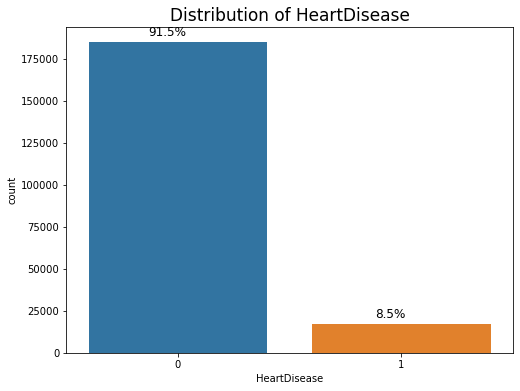

In [34]:
# check the distribution of the target variable to see if there's any imbalance in its distribution

""" From the distribution of the target variable it's clear that it's hihly imbalanced, 
    there's 92% respondents with NO heart disease and only 8% respondents has heart disease.
    Such high imbalance in the target needs to be incorporated in the model as it 
    can lead to overfitting (model only predicting the majority class - people with no heart disease)
    """
def target(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12,ha = 'center', va = 'center', xytext = (0, 10), 
                                                                      textcoords = 'offset points')

plt.show()

plt.figure(figsize=(8, 6))
plt.title("Distribution of HeartDisease",fontsize=17)
plot = sns.countplot(data['HeartDisease'])


target(plot,data.HeartDisease)

In [37]:
# seperate categorical and continous variables for further visualization
categorical_val = []
continous_val = []
for column in data.columns:
    if len(data[column].unique()) <= 13:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [39]:
continous_val

['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

In [38]:
categorical_val

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Income',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

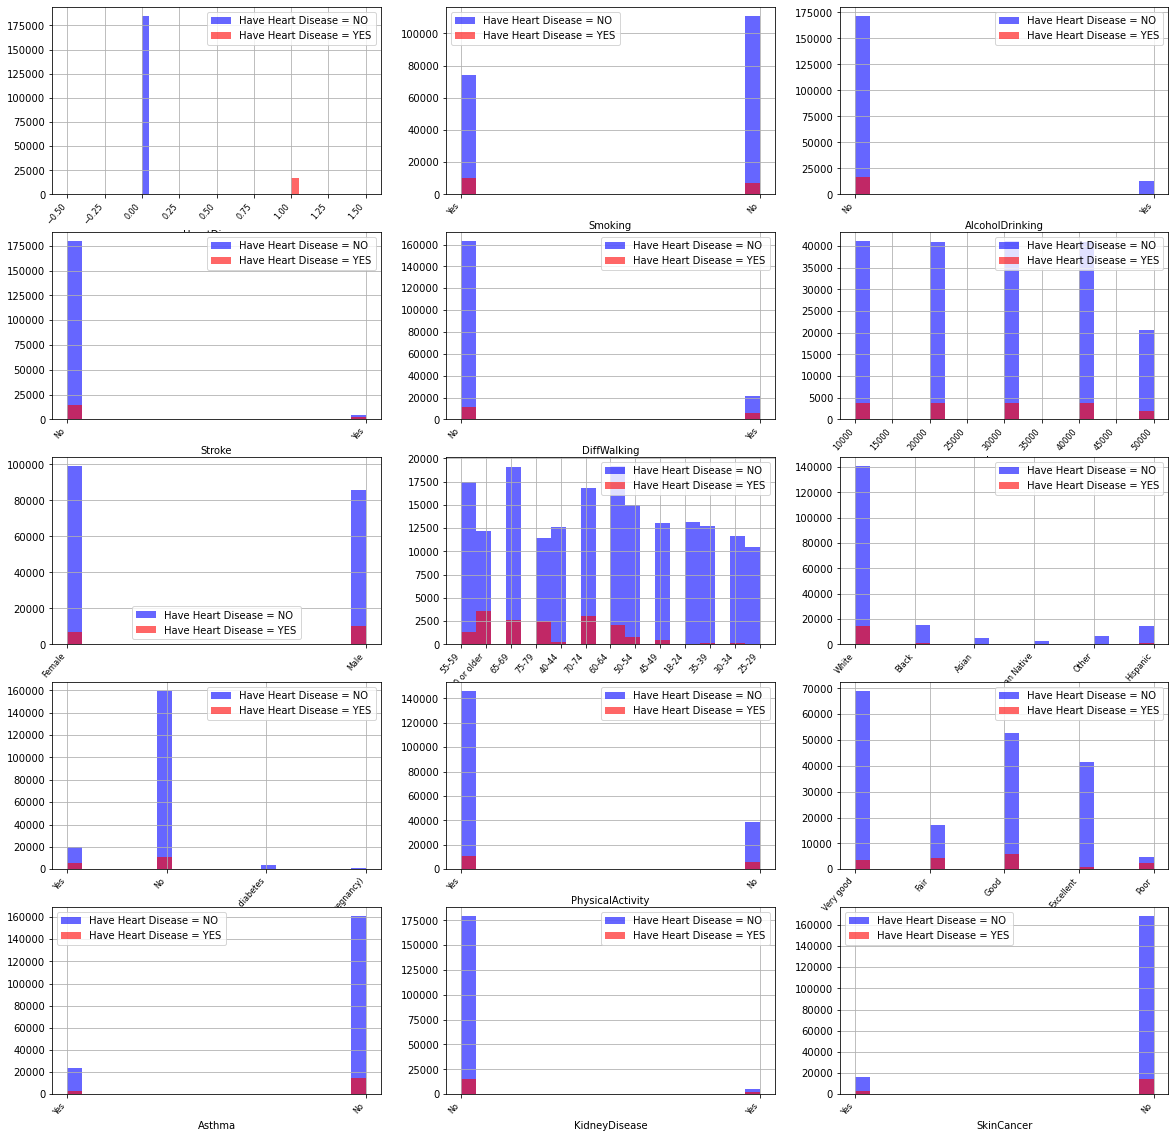

In [67]:
# Target vs. Categorical features

plt.figure(figsize=(20, 20))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(5, 3, i)
    data[data["HeartDisease"] == 0][column].hist(bins=20, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["HeartDisease"] == 1][column].hist(bins=20, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)
    plt.xticks(rotation=49, ha='right',fontsize=8)

- Smoking - people who have smoked at least 100 cigarettes in their entire life are more likey to have a heart disease.
- Alcohol Drinking - heavy drinkers are more likeyl to have a heart disease.
- Stroke - having a stroke is an indication of being at risk of a heart disease, there's more respondents with heart disease and reported stroke than those who didn't report having a stroke.
- DiffWalking - very few respondents who had difficulty walking/climbing stairs reported a heart disease compared to those who did not have a heart disease. Having difficulty walking/climbing stairs might not be an indicator of a heart disease.
- Income - people with a montly income less than 50000 are more likely to have a heart disease.
- Gender - Males are more likey to experience a heart disease than females.
- Age Category - Elderly people (above 40 years of age) are more likely to have a heart diesease than people below 39 years.
- Race -  White people reported more heart disease more than other races.
- Diabetic - Having had diabetis shows an indication of being at risk of heart disease. 
- PhysicalActivity - People who do not regularly exercise are more likely to have heart disease
- GenHealth - people with poor general health are more likely to have heart disease.

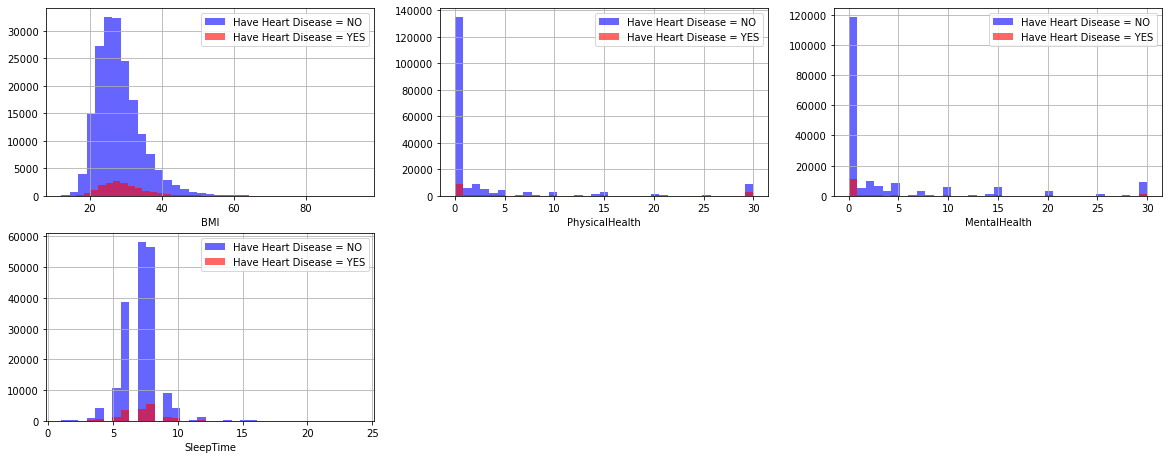

In [70]:
# Target vs. Continuous features

plt.figure(figsize=(20, 20))

for i, column in enumerate(continous_val, 1):
    plt.subplot(5, 3, i)
    data[data["HeartDisease"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["HeartDisease"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

- BMI -  a BMI above 25 is a cause for concern, people with  a BMI more than this are most likey to have a heart disease.
- PhysicalHealth - there's no clear indication of a physical illness and injuries leading to a risk of heart disease. Research also shows that such an occurance would simply be a trigger of an already diseased heart not cause.
- Mental Health - no clear indication of a heart disease.
- SleepTime - people who sleep for less than 8-9 hours a day are most likey to be at risk of heart disease.

### 4. Check for Correlations

- Checking for correlations of the numeric variables helps to unpack any stong/weak relationships between the variables and see if there's any multi-collinearity among independent variables. If any strong correlation is observed between two independent variables it means that both those variables explain the same information about the target variable and one of them can be dropped in the model training (with corr >0.70) because if both are used we might lose reliability in determining the effects of each of the individual independent variables on the target variable in the model.

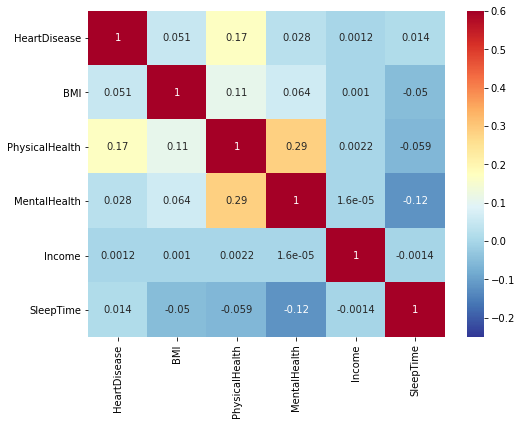

In [73]:
# no numeric variables seem to be highly correlated with each other, as can be seen from the heatmap and pairplot below
# correlation rnages from -1 t0 1 (closer to one is high correlation - strong red)
plt.figure(figsize = (8,6))

sns.heatmap(data.corr(), cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6);

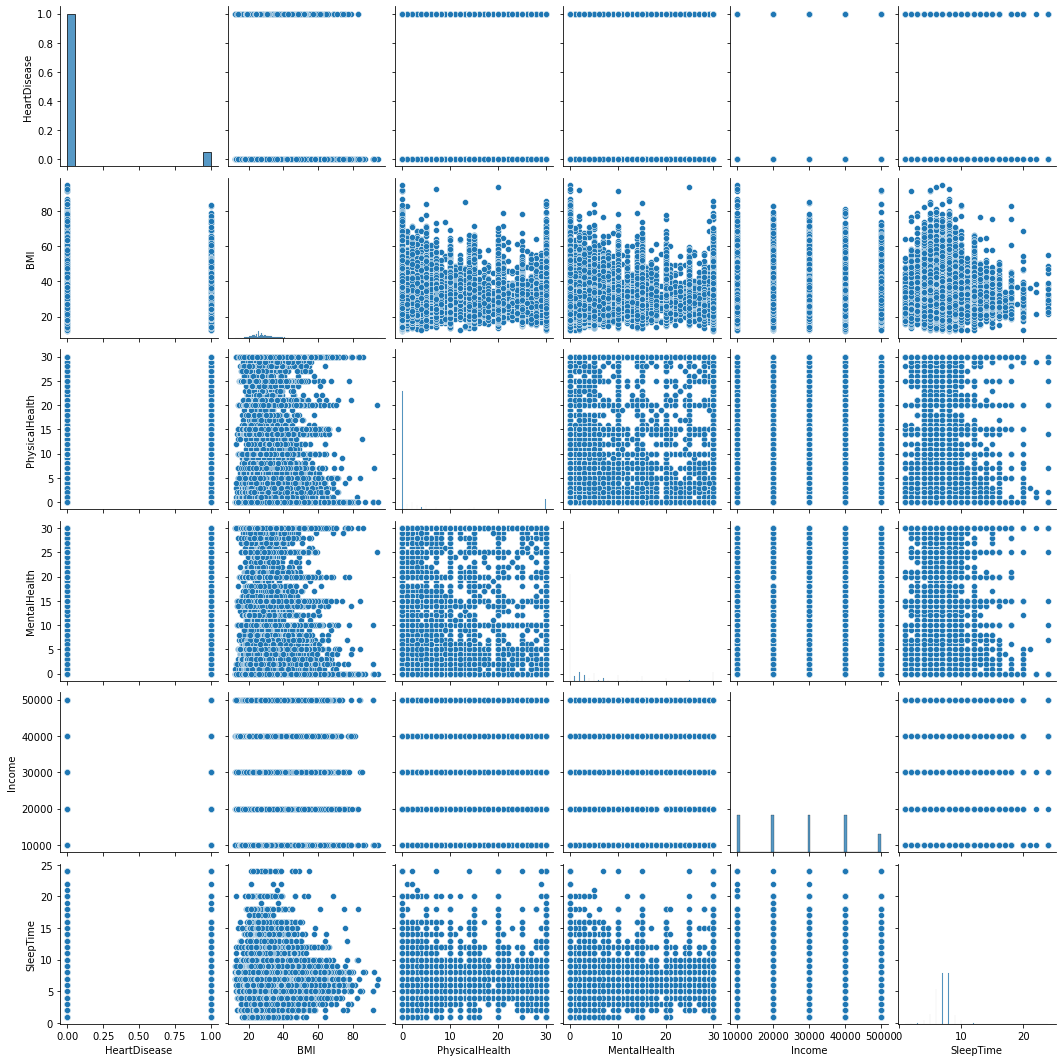

In [75]:
sns.pairplot(data)

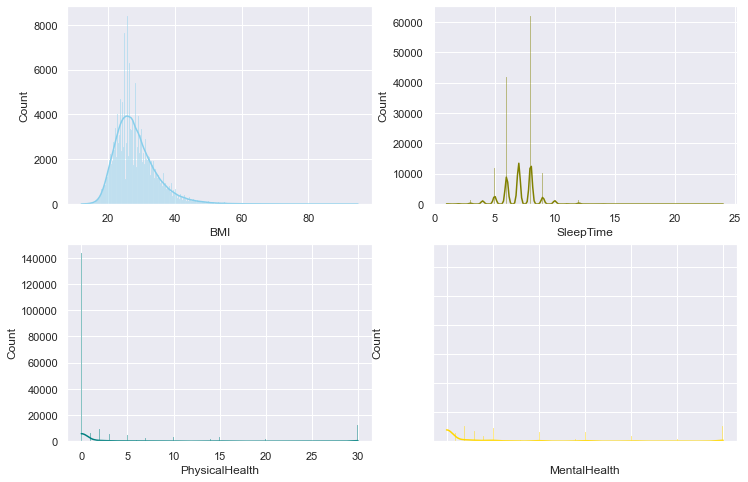

In [92]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(data=data, x="BMI", kde=True, color="skyblue",ax=axs[0, 0])
sns.histplot(data=data, x="SleepTime", kde=True, color="olive",ax=axs[0, 1])
sns.histplot(data=data, x="PhysicalHealth", kde=True, color="teal",ax=axs[1, 0])
sns.histplot(data=data, x="MentalHealth", kde=True, color="gold",ax=axs[1, 1])
plt.tick_params(labelcolor='none');

### 3. Transformations

- Since earlier we mentioned that we need to transform categotical features into integers becasue machine learning models require input (X) and output (y) variables to be numeric, we need to transform all the categorical fatures that will be used in the model building.

- The tranformations to be used are one-hot encoding and label encoding. One-hot encoding assigns dummy/binary encoding to each variable with two categories. Variables with more than 2 categories will be transformed using label encoding. If a variable has a lot of unique categories, applying one-hot encoding to them would increase the feature space, label encoding overcomes this.

In [83]:
# One-hot encoding
unwanted = {'HeartDisease','GenHealth','AgeCategory','Diabetic','Income'}
 
categorical_val = [ele for ele in categorical_val if ele not in unwanted]

df = pd.get_dummies(data, columns = categorical_val)
df.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,Income,AgeCategory,Diabetic,GenHealth,SleepTime,Smoking_No,...,Race_Other,Race_White,PhysicalActivity_No,PhysicalActivity_Yes,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,0,16.60,3,30,30000,55-59,Yes,Very good,5,0,...,0,1,0,1,0,1,1,0,0,1
1,0,20.34,0,0,40000,80 or older,No,Very good,7,1,...,0,1,0,1,1,0,1,0,1,0
2,0,26.58,20,30,40000,65-69,Yes,Fair,8,0,...,0,1,0,1,0,1,1,0,1,0
3,0,24.21,0,0,40000,75-79,No,Good,6,1,...,0,1,1,0,1,0,1,0,0,1
4,0,23.71,28,0,40000,40-44,No,Very good,8,1,...,0,1,0,1,1,0,1,0,1,0


In [84]:
# Label encoding
le = LabelEncoder()
df['AgeCategory'] = le.fit_transform(df['AgeCategory'])
df['GenHealth'] = le.fit_transform(df['GenHealth'])
df['Diabetic'] = le.fit_transform(df['Diabetic'])

In [85]:
df.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,Income,AgeCategory,Diabetic,GenHealth,SleepTime,Smoking_No,...,Race_Other,Race_White,PhysicalActivity_No,PhysicalActivity_Yes,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,0,16.60,3,30,30000,7,2,4,5,0,...,0,1,0,1,0,1,1,0,0,1
1,0,20.34,0,0,40000,12,0,4,7,1,...,0,1,0,1,1,0,1,0,1,0
2,0,26.58,20,30,40000,9,2,1,8,0,...,0,1,0,1,0,1,1,0,1,0
3,0,24.21,0,0,40000,11,0,2,6,1,...,0,1,1,0,1,0,1,0,0,1
4,0,23.71,28,0,40000,4,0,4,8,1,...,0,1,0,1,1,0,1,0,1,0


### 5. Training and Test set

In [87]:
X = df.drop('HeartDisease',axis = 1)     # independent features
y = df['HeartDisease']                # target

In [94]:
# Split data - 70% Train and 30% Test
# random state 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [95]:
# dimension of each set
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(141484, 32) (141484,)
(60637, 32) (60637,)


### Train model - Random Forest Classifier

In [107]:
""" 
Random Forests are commonly reported as one of the most accurate learning algorithms. 
Since earlier we've seen that the target is highly imbalanced,
the Random Forest classifier tends to be biased towards the majority class (people with no heart disease) 
on imbalanced target variable classes, we shall place a heavier penalty on 
misclassifying the minority class (people with heart disease). 
Since majority class is 92%, it means that the classifier will always be 90+% accurate which is misleading
or will always predict that there's no risk of heart disease.
The argument value of classs_weight = ‘balanced‘ can be provided to automatically use the inverse
weighting from the training dataset, giving focus to the minority class as well.
Random Forest has a built-in weight adjusting parameters to deal with imbalanced data.
Since we are dealing with imbalanced data, accuracy is not a suitable metric to compare model performances.
F1 score, Recall and Precision are better metrics to evaluate the performance of the model.

"""

''

In [98]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [102]:
import time
start_time = time.time()

rf_clf = RandomForestClassifier(n_estimators=150,max_depth=16,criterion='gini',class_weight='balanced'
                            ,min_samples_split=10,max_leaf_nodes=20,max_features=0.5,bootstrap=True)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)


print("--- %s seconds ---" % (time.time() - start_time))

Train Result:
Accuracy Score: 70.69%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.976312      0.199601  0.706914       0.587956       0.910523
recall          0.696695      0.817340  0.706914       0.757017       0.706914
f1-score        0.813137      0.320848  0.706914       0.566992       0.771439
support    129500.000000  11984.000000  0.706914  141484.000000  141484.000000
_______________________________________________
Confusion Matrix: 
 [[90222 39278]
 [ 2189  9795]]

Test Result:
Accuracy Score: 70.63%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.976184     0.202957  0.706268      0.589571      0.909416
recall         0.695475     0.820474  0.706268      0.757974      0.706268
f1-score       0.812261     0.325418  0.706268      0.568839     

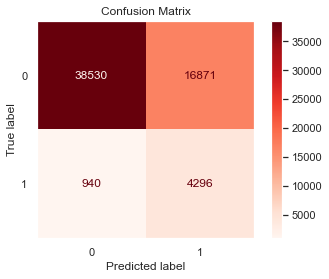

In [110]:
# confusion matrix of the test set
y_pred = rf_clf .predict(X_test)

plot_confusion_matrix(rf_clf , X_test, y_test, cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

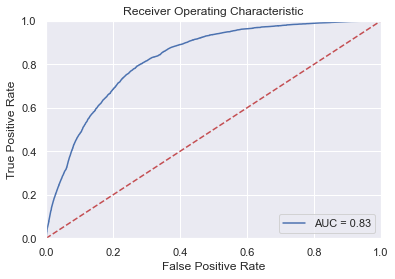

In [111]:
# ROC CURVE FOR THE RF MODEL
probs = rf_clf.predict_proba(X_test)  
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 6. & 7. Steps to improve model hyperparameter tuning 
   ### and Model evaluation

In [ ]:
"""
Inorder to try and maximize the performance of the random forest, a random search for better hyperparameters is applied. 
This will randomly select combinations of hyperparameters from a grid, evaluate them using cross validation
on the training data, and return the values that perform the best.
"""

In [125]:
import time
start_time = time.time()

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search (which is the model)
rf_clf = RandomForestClassifier(random_state = 100,criterion='gini',class_weight='balanced')

# Create the random search model
rf_cv = RandomizedSearchCV(rf_clf, param_grid, n_jobs = -1, 
                        scoring = 'f1', cv = 3, 
                        n_iter = 10, verbose = 1, random_state=100)

# Fit 
rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params,class_weight='balanced')
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)


print("--- %s seconds ---" % (time.time() - start_time))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'n_estimators': 41, 'min_samples_split': 10, 'max_leaf_nodes': 37, 'max_features': 0.7, 'max_depth': 14, 'bootstrap': True}
Train Result:
Accuracy Score: 72.07%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.976186      0.207106  0.720703       0.591646       0.911044
recall          0.712232      0.812250  0.720703       0.762241       0.720703
f1-score        0.823577      0.330056  0.720703       0.576816       0.781774
support    129500.000000  11984.000000  0.720703  141484.000000  141484.000000
_______________________________________________
Confusion Matrix: 
 [[92234 37266]
 [ 2250  9734]]

Test Result:
Accuracy Score: 72.00%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision   

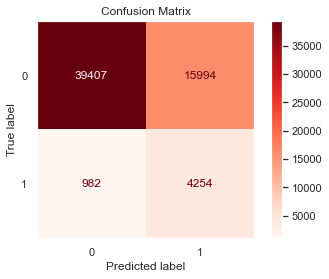

In [126]:
# confusion matrix of the test set
y_pred = rf_clf.predict(X_test)

plot_confusion_matrix(rf_clf , X_test, y_test, cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

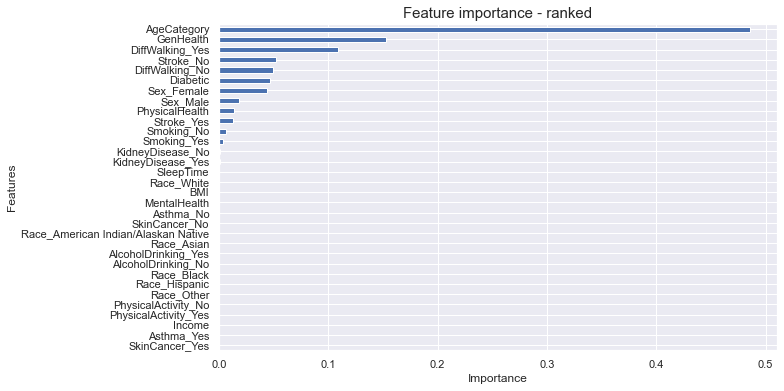

In [133]:
# Important features in predicting the risk of heart disease
# The feature importance in a random forest indicates the sum of the reduction in Gini Impurity 

plt.figure(figsize=(10,6))

feat_importances = pd.Series(rf_clf.feature_importances_, index=X_train.columns)
feat_importances.nsmallest(40).plot(kind='barh')
importances = rf_clf.feature_importances_
indices = np.argsort(importances)


plt.xlabel('Importance')
plt.ylabel('Features')
plt.title("Feature importance - ranked",fontsize=15)
plt.show()

In [ ]:
"""After tuning the hyperparameters and using cross validation, the clasiffier's performance has improved slightly, 
from 70% accuracy to 72%. The Recall, F1-Score and Precision have also slighly improved from the initial model.

The accuracy for both train and test set are almost equal, 
which means the model is able to generalize beyond the data it was trained on. 
This is an indication that the argument value of classs_weight = ‘balanced‘ accounted for overfitting.
The confusion matrix also shows there's a low false positive rate, 30% which lowers the risk of misclassifying
someone as having a heart disease risk, essentially we want to have as low false positive rate as possible. 
The Recall of the classifier is 82%, meaning if someone is at risk of having a heart disease, 
it will always correctly classify them with 82% accuracy. 
"""

### 8. Motivate if the model in its current form will be sufficient for its intended purpose or not

- There is a room for more improvement of the model, but this baseline model is still doing fairly good in predicting the risk of a heart disease. By accurately predicting someone who is at risk of heart disease with 82% accuracy so they can get an allowance to improve their health means the company can save a significant number of thier employees lives. Also the model's false positive rate is low so there will be very few cases where the company "loses" money on a misclassified positive case. This is still better than missing a positive case whose life is at risk.

- Different models such as Logistic Regression, XG Boost etc. can also be trianed and compare their performances with this model to select the best performing model.

### 9. Overfitting

- Overfitting is when a model performs well on the dataset it was trained on but performs terrible on "unseen" data. Splitting the data into train and test set helps detect overfitting by comparing the performance of the model on the two sets. The data that is used in this analysis is a perfect example. This data is highly imbalanced because there are 92% negative cases (people with no heart disease) and only 8% positive cases (people with heart disease). When a model is trained on this data and evaluated using accuracy, it's always going to be more than 90% accurate which seems as if the model is doing exceptionally well. In fact what the model is doing it's always predicting the majority case which it gets right all the time, hence high accuracy. This is overfitting. In order to see the bias of the model, recall,precision and f1-score are used instead of the accuracy when dealing with imbalanced data. 


#### - Mitigate: 
- Some machine learning models have built-in weight adjusting paramenters to deal with such data. When those parameters are incoroporated in the model, it will be able to consider both classes when it's making a prediction and not onyl focus on the majority class.
- Another way to mitigate this is to use undersampling or oversampling to balance the two classes and avoid overfitting.
- Cross-validation is also preventative measure against overfitting. The idea is to use the initial training data to generate multiple mini train-test splits and use these splits to tune the model.

### 10. Suggest alternative solutions to solve the organisation's problem 

- Instead of giving allowances to all employees, I would suggest the organization to take all the funds/bugdet and hire a professional lifestyle coach and let the coach have regular sessions with the employees. These sessions may include encouraging healthy behavior and ways to live such a lifestyle. With gudance from a professional coach who would share health and wellness ifnromation, it might be easier for employees to live a helthy lifestyle as this would even allow for more physical activity at work on a regular basis.